#Notas

##Regresion lineal multiple

$  y = a_0 + a_1x_1 + a_2x_{2i} + e$

$ S_r = \sum e^2 = \sum(y_i - a_0 - a_1x_{1i} - a_2x_{2i})^2 $

$ \frac{dS_r}{da_2}=-2\sum x_{2i}(y_i-a_0-a_1x_{1i}-a_2x_{2i}) $

$ \frac{dS_r}{da_2}=-2\sum (x_{2i}y_i - a_0x_{2i} - a_1x_{1i}x_{2i} - a_2x_{2i}^2) =0$ 

$ \sum x_{2i}y_i - \sum a_0x_{2i} - \sum a_1x_{1i}x_{2i}  - \sum a_2x_{2i}^2 = 0$

$ (\sum x_{2i})a_0 + (\sum x_{1i}x_{2i})a_1 + (\sum x_{2i}^2)a_2 = \sum x_{2i}y_i  $

Error estandar:
$ S_{\frac{y}{x}} = \sqrt{\frac{S_r}{n-(m+1)}} $



#Ejemplo

In [28]:
x1=[0,2,2.5,1,4,7]
x2=[0,1,2,3,6,2]
y=[2.5,5.5,5,0,1.5,13]

In [29]:
import numpy
xx1=[]
x1x2=[]
xx2=[]
x1y=[]
x2y=[]
st=[]
sr=[]



N=len(x1)

#Sumatoria
sx1=0
sx2=0
sy=0
sxx1=0
sx1x2=0
sxx2=0
sx1y=0
sx2y=0
St=0
Sr=0



for i in range(N):
  sx1=sx1+x1[i]
  sx2=sx2+x2[i]
  sy=sy+y[i]


  xx1.append(x1[i]**2)
  x1x2.append(x1[i]*x2[i])
  xx2.append(x2[i]**2)
  x1y.append(x1[i]*y[i])
  x2y.append(x2[i]*y[i])

  sxx1=sxx1+xx1[i]
  sxx2=sxx2+xx2[i]
  sx1x2=sx1x2+x1x2[i]
  sx1y=sx1y+x1y[i]
  sx2y=sx2y+x2y[i]
  

#Promedio
py=sy/N


In [30]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones
# de la forma A.X=B
# INGRESO
A = numpy.array([[N,sx1,sx2],
              [sx1,sxx1,sx1x2],
              [sx2,sx1x2,sxx2]])

B = numpy.array([[sy],
              [sx1y],
              [sx2y]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0

# Evitar truncamiento en operaciones
A = numpy.array(A,dtype=float) 

# Matriz aumentada
AB = numpy.concatenate((A,B),axis=1)
AB0 = numpy.copy(AB)

# Pivoteo parcial por filas
tamano = numpy.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = numpy.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = numpy.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
        
AB1 = numpy.copy(AB)

# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = numpy.copy(AB)

# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = numpy.copy(AB[:,ultcolumna])
X = numpy.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[  6.    16.5   14.    27.5 ]
 [ 16.5   76.25  48.   120.5 ]
 [ 14.    48.    54.    50.5 ]]
Pivoteo parcial por filas
[[ 16.5   76.25  48.   120.5 ]
 [ 14.    48.    54.    50.5 ]
 [  6.    16.5   14.    27.5 ]]
eliminacion hacia adelante
[[ 1.65000000e+01  7.62500000e+01  4.80000000e+01  1.20500000e+02]
 [ 0.00000000e+00 -1.66969697e+01  1.32727273e+01 -5.17424242e+01]
 [ 0.00000000e+00  1.77635684e-15 -1.23793103e+01  1.84741379e+01]]
eliminación hacia atrás
[[ 1.00000000e+00  0.00000000e+00  4.91641412e-16  2.80574696e+00]
 [-0.00000000e+00  1.00000000e+00 -1.06387978e-16  1.91262278e+00]
 [-0.00000000e+00 -1.43494007e-16  1.00000000e+00 -1.49233983e+00]]
solución de X: 
[[ 2.80574696]
 [ 1.91262278]
 [-1.49233983]]


In [31]:

print("n =",N)
print("")
print("Sumatoria x1:",sx1)
print("Sumatoria x2:",sx2)
print("Sumatoria y:",sy)
print("Sumatoria xx1:",sxx1)
print("Sumatoria x1x2:",sx1x2)
print("Sumatoria xx2:",sxx2)
print("Sumatoria x1y:",sx1y)
print("Sumatoria x2y:",sx2y)
print("")


print("Promedio y:",py)
print("")

a0=X[0]
a1=X[1]
a2=X[2]


for i in range(N):
  st.append((y[i]-py)**2)
  sr.append((y[i]-a0-a1*x1[i]-a2*x2[i])**2)


  St=St+st[i]
  Sr=Sr+sr[i]


#Raices
Sy=numpy.sqrt(St/(N-1))
Syx=numpy.sqrt(Sr/(N-2))
r=numpy.sqrt(((St-Sr)/St))*100

print("a0=",a0)
print("a1=",a1)
print("a2=",a2)

print("")
print("St=",St)
print("Sr=",Sr)

print("Sy=",Sy)
print("Sy/x=",Syx)
print("r=",r,"%")


print("")
print("y=",a0,"+",a1,"x1","+",a2,"x2")

St=0
Sr=0

n = 6

Sumatoria x1: 16.5
Sumatoria x2: 14
Sumatoria y: 27.5
Sumatoria xx1: 76.25
Sumatoria x1x2: 48.0
Sumatoria xx2: 54
Sumatoria x1y: 120.5
Sumatoria x2y: 50.5

Promedio y: 4.583333333333333

a0= [2.80574696]
a1= [1.91262278]
a2= [-1.49233983]

St= 106.70833333333336
Sr= [0.48407492]
Sy= 4.619704175233158
Sy/x= [0.34787746]
r= [99.77292066] %

y= [2.80574696] + [1.91262278] x1 + [-1.49233983] x2


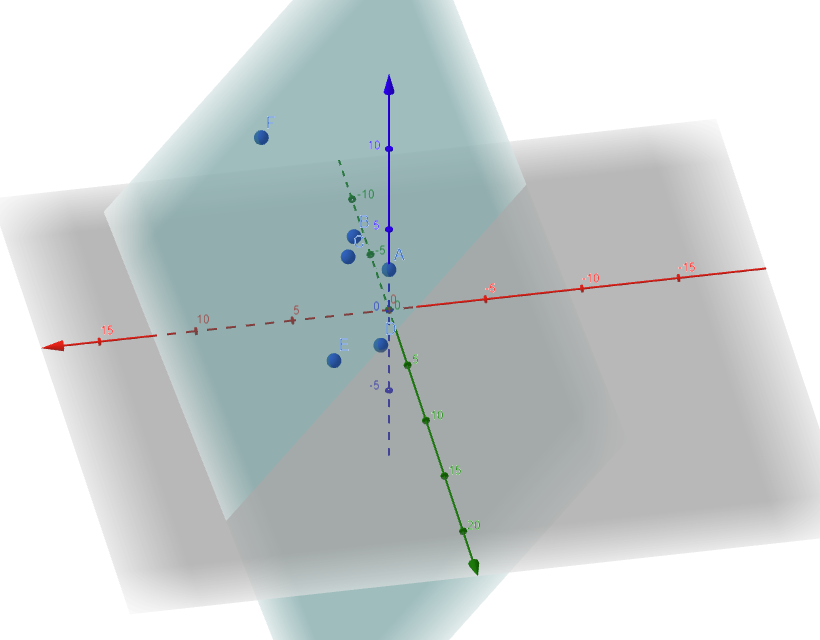

###Mal intento de grafica

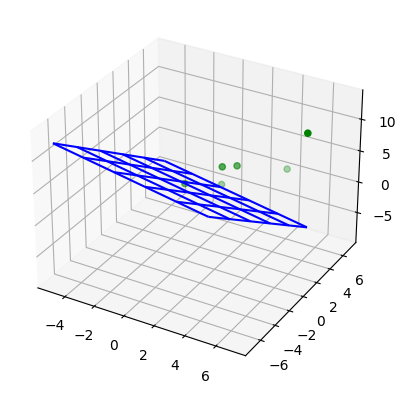

In [41]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot

#Función
def fx(x,y,a0,a1,a2):
    return a0 + a1*x + a2*y
# Valores de X que toma el gráfico.
rango = range(-10, 15)

#Grafica
fig = pyplot.figure()
ax1 = fig.add_subplot(111,projection='3d')


#Limites de los ejes
#pyplot.xlim(-3, 10)
#pyplot.ylim(-2, 10)


ax = -5     # Intervalo X
bx = 5
ay = ax-2   # Intervalo Y
by = bx+2


z0 = lambda x,y: (-A[0,0]*x - A[0,1]*y + B[0])/A[0,2]

muestras = N

xi = numpy.linspace(ax,bx, muestras)
yi = numpy.linspace(ay,by, muestras)
Xi, Yi = numpy.meshgrid(xi,yi)

Z0 = z0(Xi,Yi)

#Grafica 3d
ax1.scatter(x1, x2, y, c='g', marker='o')


#Plano

ax1.plot_wireframe(Xi,Yi,Z0,
                       color ='blue',
                       label='Ecuación 1')



pyplot.savefig("output.png")

pyplot.show()

#Taller

In [42]:
x1=[1,1,2,3,1,2,3,3]
x2=[0,1,1,2,2,3,3,1]
y=[3.2,6,2.2,2.5,6.5,6.6,3.5,0.2]

In [43]:
import numpy
xx1=[]
x1x2=[]
xx2=[]
x1y=[]
x2y=[]
st=[]
sr=[]



N=len(x1)

#Sumatoria
sx1=0
sx2=0
sy=0
sxx1=0
sx1x2=0
sxx2=0
sx1y=0
sx2y=0
St=0
Sr=0



for i in range(N):
  sx1=sx1+x1[i]
  sx2=sx2+x2[i]
  sy=sy+y[i]


  xx1.append(x1[i]**2)
  x1x2.append(x1[i]*x2[i])
  xx2.append(x2[i]**2)
  x1y.append(x1[i]*y[i])
  x2y.append(x2[i]*y[i])

  sxx1=sxx1+xx1[i]
  sxx2=sxx2+xx2[i]
  sx1x2=sx1x2+x1x2[i]
  sx1y=sx1y+x1y[i]
  sx2y=sx2y+x2y[i]
  

#Promedio
py=sy/N


In [44]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones
# de la forma A.X=B
# INGRESO
A = numpy.array([[N,sx1,sx2],
              [sx1,sxx1,sx1x2],
              [sx2,sx1x2,sxx2]])

B = numpy.array([[sy],
              [sx1y],
              [sx2y]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0

# Evitar truncamiento en operaciones
A = numpy.array(A,dtype=float) 

# Matriz aumentada
AB = numpy.concatenate((A,B),axis=1)
AB0 = numpy.copy(AB)

# Pivoteo parcial por filas
tamano = numpy.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = numpy.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = numpy.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
        
AB1 = numpy.copy(AB)

# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = numpy.copy(AB)

# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = numpy.copy(AB[:,ultcolumna])
X = numpy.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[ 8.  16.  13.  30.7]
 [16.  38.  29.  51.9]
 [13.  29.  29.  56.7]]
Pivoteo parcial por filas
[[16.  38.  29.  51.9]
 [13.  29.  29.  56.7]
 [ 8.  16.  13.  30.7]]
eliminacion hacia adelante
[[ 16.       38.       29.       51.9    ]
 [  0.       -1.875     5.4375   14.53125]
 [  0.        0.      -10.2     -18.5    ]]
eliminación hacia atrás
[[ 1.00000000e+00  0.00000000e+00 -1.12502600e-15  5.87058824e+00]
 [-0.00000000e+00  1.00000000e+00  4.73695157e-16 -2.49019608e+00]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00  1.81372549e+00]]
solución de X: 
[[ 5.87058824]
 [-2.49019608]
 [ 1.81372549]]


In [45]:

print("n =",N)
print("")
print("Sumatoria x1:",sx1)
print("Sumatoria x2:",sx2)
print("Sumatoria y:",sy)
print("Sumatoria xx1:",sxx1)
print("Sumatoria x1x2:",sx1x2)
print("Sumatoria xx2:",sxx2)
print("Sumatoria x1y:",sx1y)
print("Sumatoria x2y:",sx2y)
print("")


print("Promedio y:",py)
print("")

a0=X[0]
a1=X[1]
a2=X[2]


for i in range(N):
  st.append((y[i]-py)**2)
  sr.append((y[i]-a0-a1*x1[i]-a2*x2[i])**2)


  St=St+st[i]
  Sr=Sr+sr[i]


#Raices
Sy=numpy.sqrt(St/(N-1))
Syx=numpy.sqrt(Sr/(N-2))
r=numpy.sqrt(((St-Sr)/St))*100

print("a0=",a0)
print("a1=",a1)
print("a2=",a2)

print("")
print("St=",St)
print("Sr=",Sr)

print("Sy=",Sy)
print("Sy/x=",Syx)
print("r=",r,"%")


print("")
print("y=",a0,"+",a1,"x1","+",a2,"x2")

St=0
Sr=0

n = 8

Sumatoria x1: 16
Sumatoria x2: 13
Sumatoria y: 30.7
Sumatoria xx1: 38
Sumatoria x1x2: 29
Sumatoria xx2: 29
Sumatoria x1y: 51.9
Sumatoria x2y: 56.7

Promedio y: 3.8375

a0= [5.87058824]
a1= [-2.49019608]
a2= [1.81372549]

St= 37.61875
Sr= [1.60588235]
Sy= 2.3182120573530676
Sy/x= [0.51734617]
r= [97.84230426] %

y= [5.87058824] + [-2.49019608] x1 + [1.81372549] x2


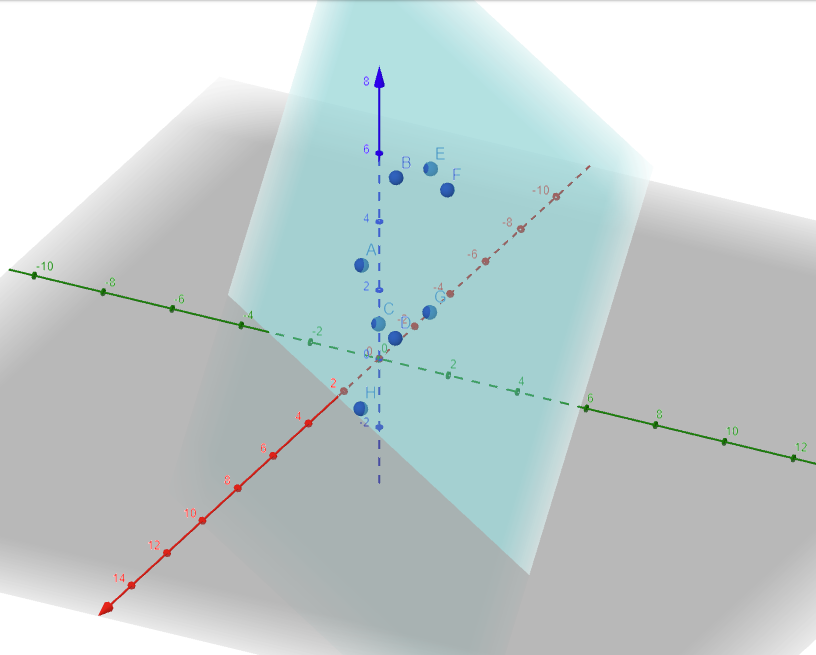